In [1]:
from metrics.visualization_metrics import visualization
import pandas as pd
from metrics.discriminative_metrics import discriminative_score_metrics
import numpy as np

In [ ]:
from model import *

In [2]:
input_file = 'emotion_output.csv'
df = pd.read_csv(input_file)
y = df['label']
x = df[['happy','angry','disgust','sad','fear','neutral','surprise']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,shuffle=True)

# XGBoostClassifier


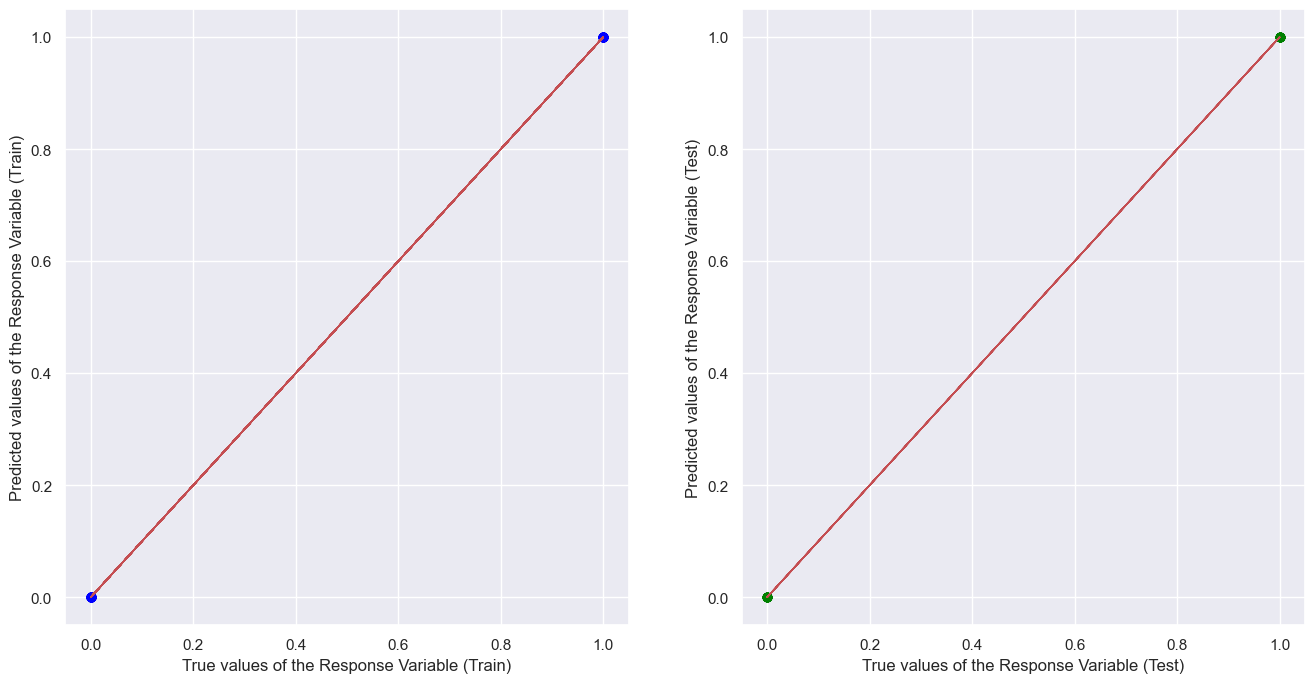

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Cross_val_Scores: [1.         1.         0.94117647 1.         1.        ]


In [9]:
y_train_pred_x, y_test_pred_x, xreg = xgbreg(input_file,x_train, x_test, y_train, y_test)

f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(y_train, y_train_pred_x, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, xgbreg(input_file,x_train, x_test, y_train, y_test)[1], color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", xreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_x))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", xreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_x))
print()

scores = cross_val_score(xreg, x_train, y_train, scoring = "accuracy")
print("Cross_val_Scores:", scores)

Variable: happy Importance: 1.0
Variable: angry Importance: 0.0
Variable: disgust Importance: 0.0
Variable: sad Importance: 0.0
Variable: fear Importance: 0.0
Variable: neutral Importance: 0.0
Variable: surprise Importance: 0.0


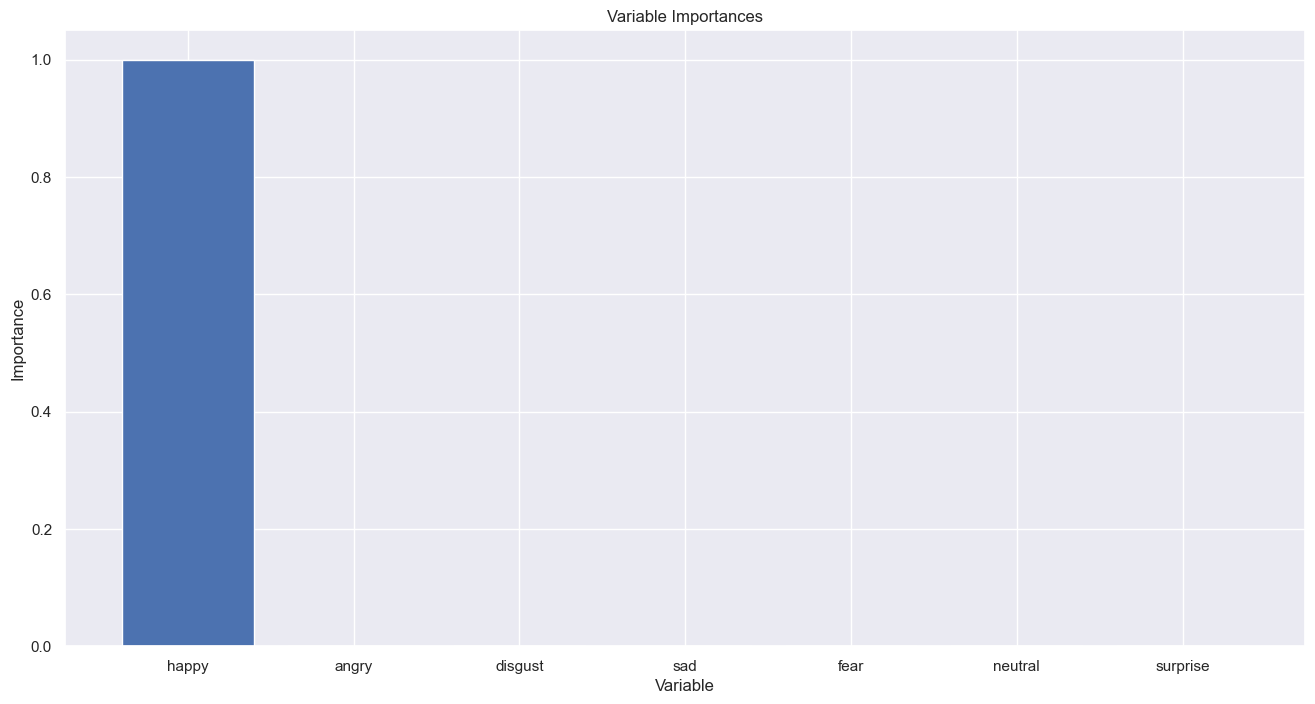

In [4]:
importances = list(xreg.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];

f = plt.figure(figsize=(16,8))
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, x_train.columns, rotation='horizontal')
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');

# Logistic Regression


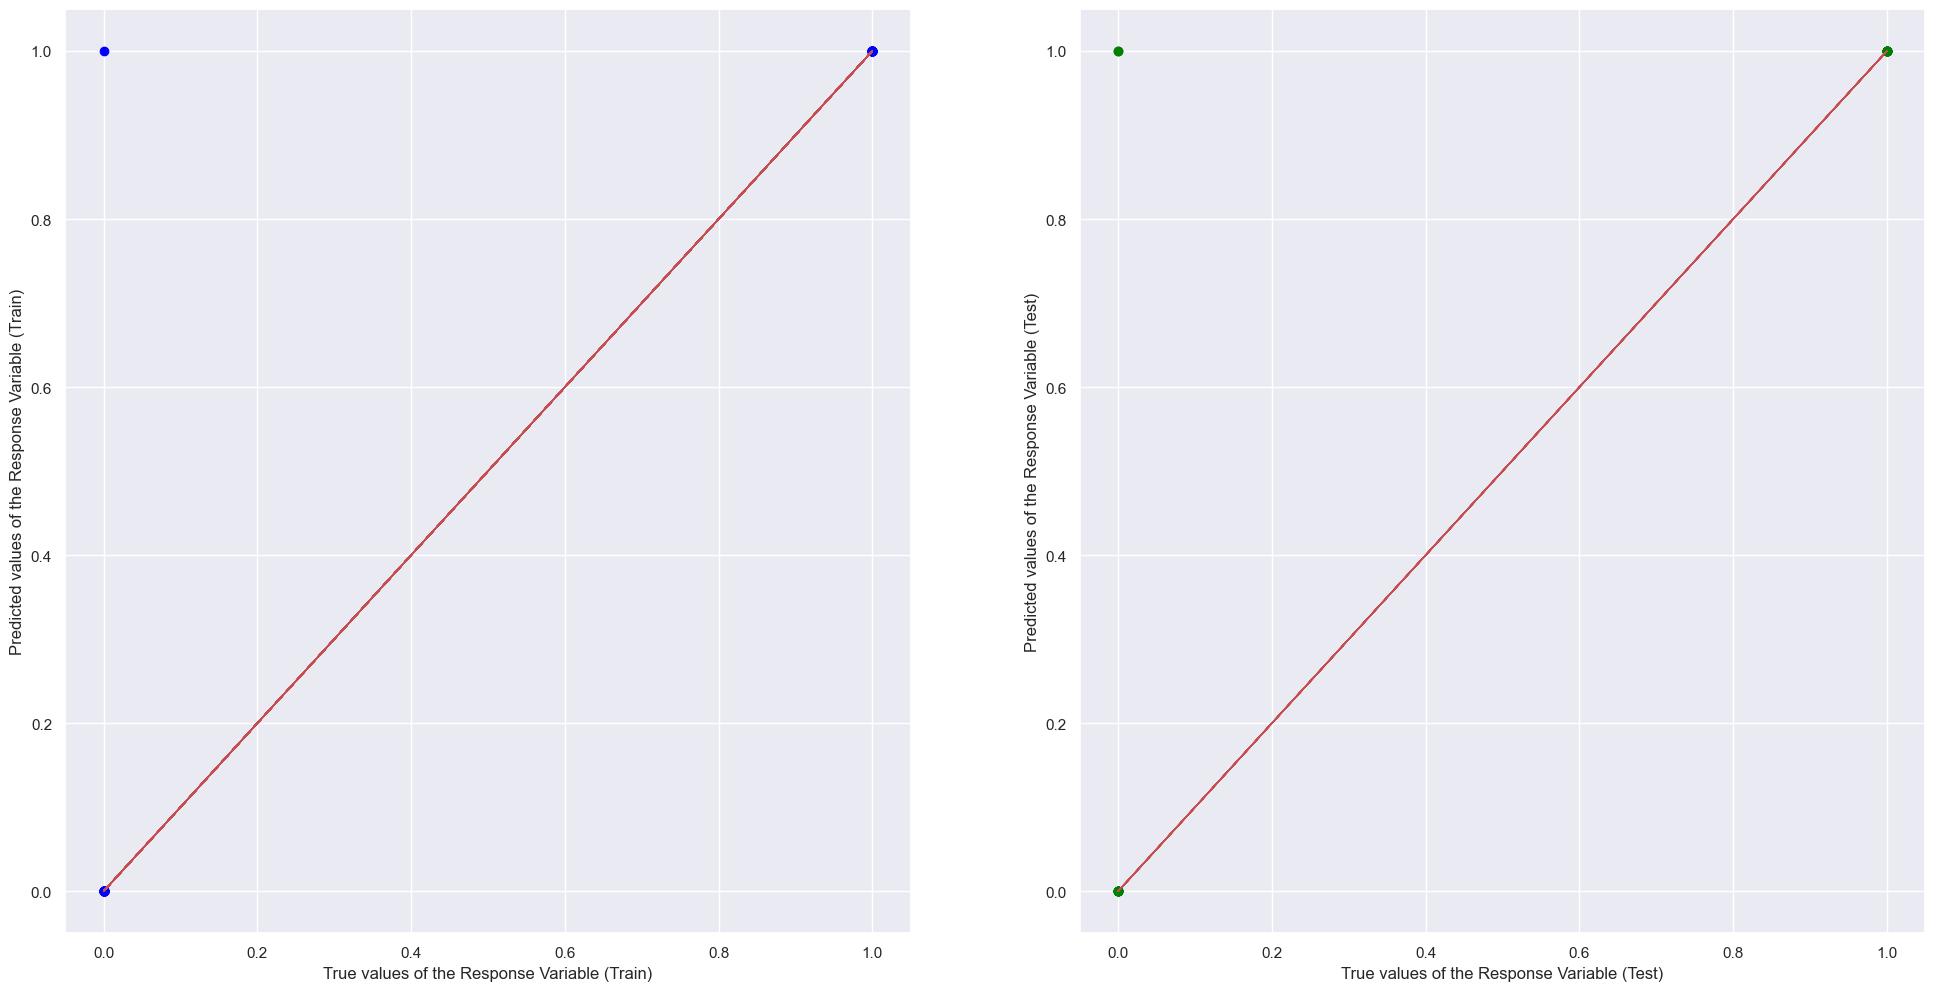

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9882352941176471
Mean Squared Error (MSE) 	: 0.011764705882352941

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9310344827586207
Mean Squared Error (MSE) 	: 0.06896551724137931

Cross_val_Scores: [1.         1.         0.94117647 1.         0.94117647]


In [5]:
y_train_pred_log, y_test_pred_log, logreg = logreg(input_file,x_train, x_test, y_train, y_test)

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred_log, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred_log, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_log))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_log))
print()

scores = cross_val_score(logreg, x_train, y_train, scoring = "accuracy")
print("Cross_val_Scores:", scores)

# Random Forest

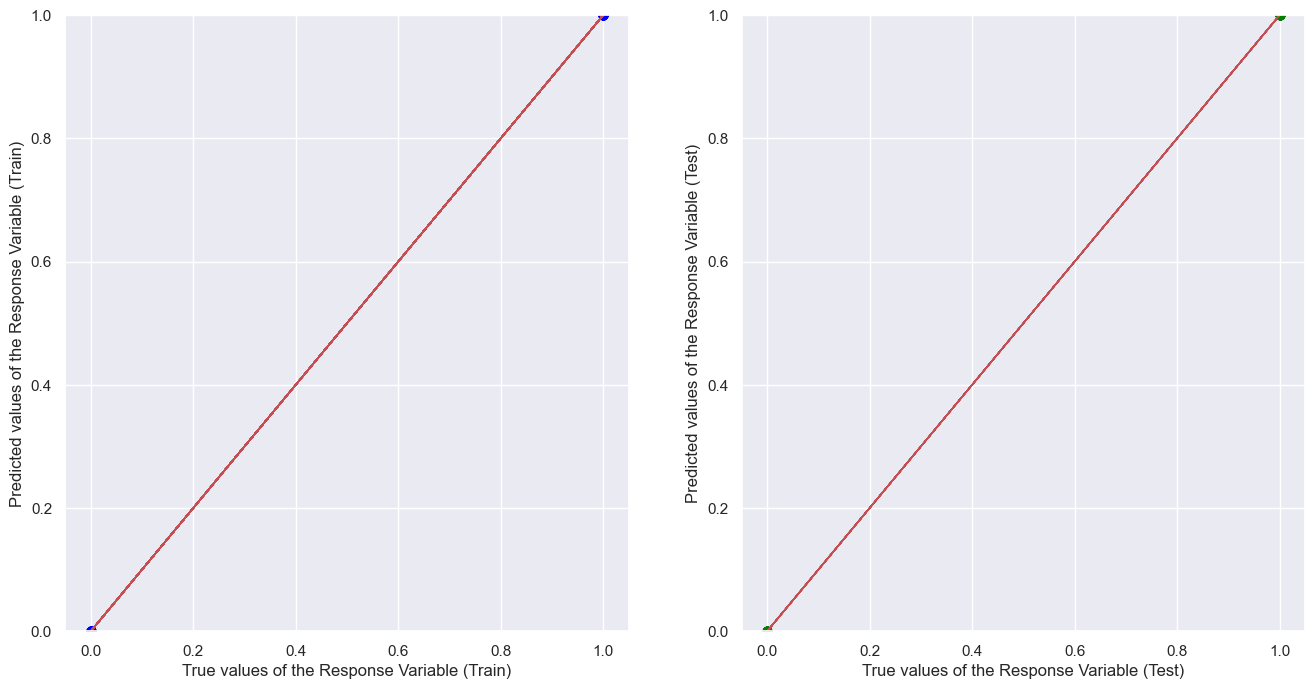

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Cross_val_Scores: [1.         1.         0.94117647 1.         1.        ]


In [6]:
y_train_pred_for, y_test_pred_for, base = forreg(input_file,x_train, x_test, y_train, y_test)

f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(y_train, y_train_pred_for, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred_for, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[0].set_ylim(0,1)
axes[1].set_ylim(0,1)
plt.show()


print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", base.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred_for))
print()


print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", base.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred_for))
print()

scores = cross_val_score(base, x_train, y_train, scoring = "accuracy")
print("Cross_val_Scores:", scores)

Variable: angry Importance: 0.33
Variable: happy Importance: 0.23
Variable: neutral Importance: 0.17
Variable: fear Importance: 0.13
Variable: sad Importance: 0.08
Variable: surprise Importance: 0.06
Variable: disgust Importance: 0.01


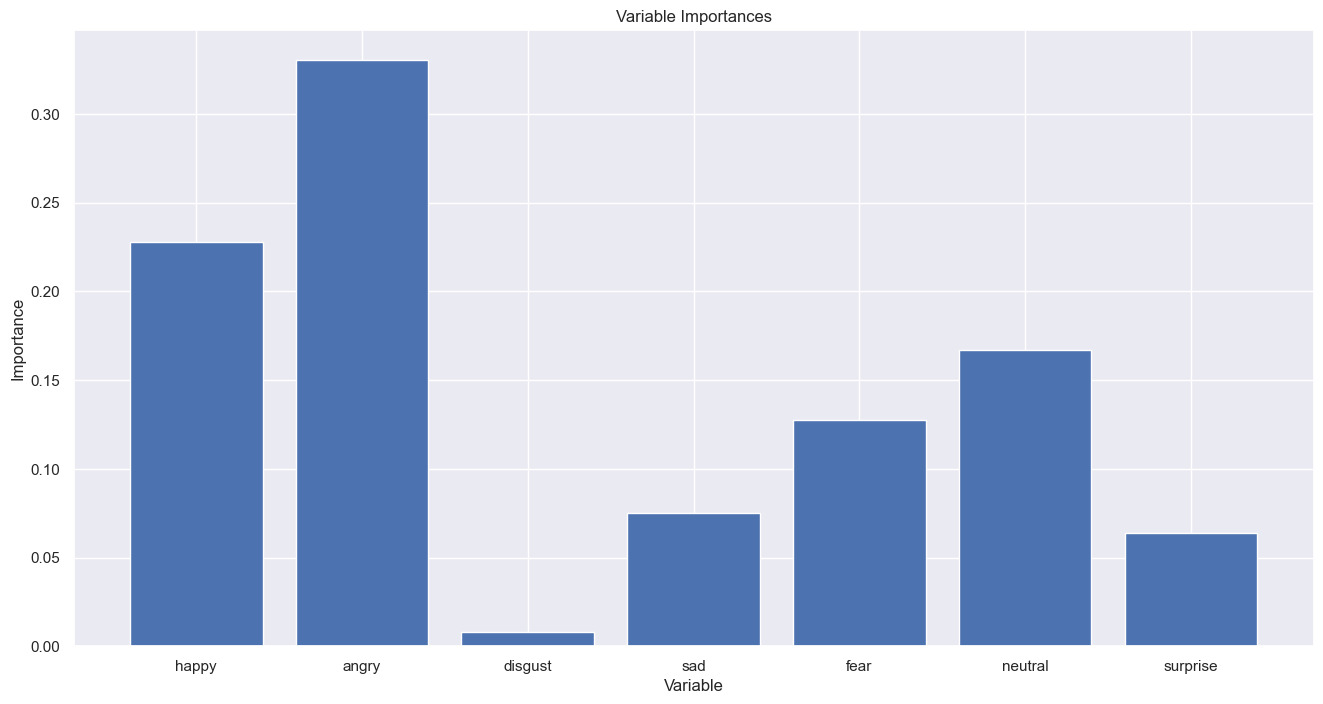

In [7]:
importances = list(base.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];

f = plt.figure(figsize=(16,8))
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, x_train.columns, rotation='horizontal')
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');

# Keras

Epoch 1/150
9/9 [==============================] - 1s 2ms/step - loss: 0.2521 - accuracy: 0.5294
Epoch 2/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2401 - accuracy: 0.5294
Epoch 3/150
9/9 [==============================] - 0s 3ms/step - loss: 0.2288 - accuracy: 0.8118
Epoch 4/150
9/9 [==============================] - 0s 2ms/step - loss: 0.2189 - accuracy: 0.9882
Epoch 5/150
9/9 [==============================] - 0s 2ms/step - loss: 0.2107 - accuracy: 0.9882
Epoch 6/150
9/9 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9882
Epoch 7/150
9/9 [==============================] - 0s 2ms/step - loss: 0.1941 - accuracy: 0.9882
Epoch 8/150
9/9 [==============================] - 0s 2ms/step - loss: 0.1855 - accuracy: 0.9882
Epoch 9/150
9/9 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9765
Epoch 10/150
9/9 [==============================] - 0s 2ms/step - loss: 0.1678 - accuracy: 0.9765
Epoch 11/150
9/9 [===========

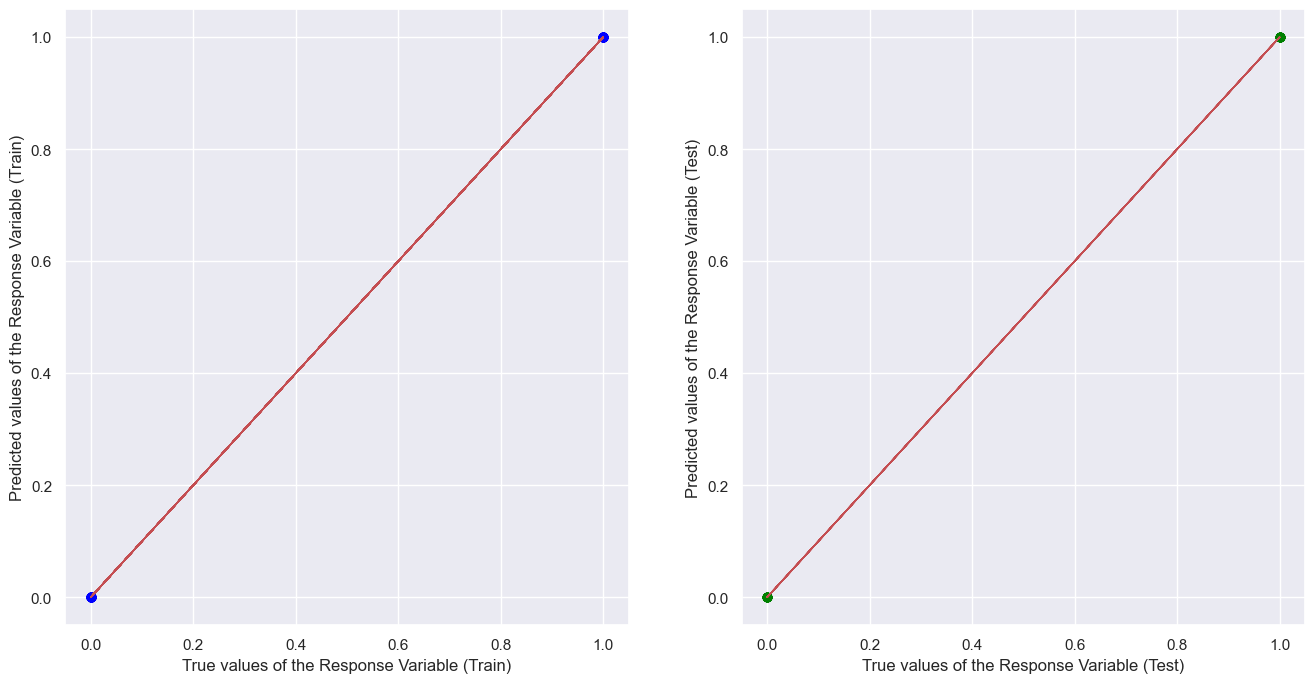

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 0.0



In [8]:
y_train_pred_ker_correct, y_test_pred_ker_correct, model = kerreg(input_file, x_train, x_test, y_train, y_test)

f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].scatter(y_train, y_train_pred_ker_correct, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred_ker_correct, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2(y_train_pred_ker_correct,y_train))
print("Mean Squared Error (MSE) \t:", mse(y_train_pred_ker_correct,y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2(y_test_pred_ker_correct,y_test))
print("Mean Squared Error (MSE) \t:", mse(y_test_pred_ker_correct,y_test))
print()